<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook</p></tp>
            <tp><p style="font-size:150%;text-align:center">Juegos (1/3) </p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

## Objetivo <a class="anchor" id="inicio"></a>

En los notebooks anteriores hemos visto cómo representar un problema mediante un ambiente de tarea. Allí vimos que solucionar un problema es hacer una búsqueda sistematica en el espacio de estados, para encontrar un camino desde el estado inicial a algún estado objetivo. Ahora veremos el problema de ganar un juego competitivo contra un humano como el desafío que debe superar una máquina y así, al hacerlo, exhibir una dosis de inteligencia. El desafío respecto al caso anterior es que ahora el entorno es dinámico, toda vez que éste cambiará de acuerdo a las acciones del contrincante. 

En este notebook estudiaremos algunas estrategias para la búsqueda de la mejor jugada en juegos de dos jugadores. Estos escenarios, a pesar de ser dinámicos, todavía son muy convenientes, toda vez que corresponden a entornos completamente observables, deterministas, discretos y conocidos. 

Adaptado de (Russell & Norvig, 2020), secciones 5.1.1, 5.2.1 y 5.2.3.

## Secciones

Desarrollaremos la explicación de la siguiente manera:

* [Definición formal del problema de confrontación](#triqui).
* [Algoritmo minimax](#minimax).
    1. [Árbol de confrontación](#arbol)
    2. [Pseudocódigo](#codigo)
    3. [Engine](#engine)


## Definición formal del problema de confrontación en juegos competitivos <a class="anchor" id="triqui"></a>

([Volver al inicio](#inicio))

Mostraremos a continuación la **definición formal de un juego competitivo**. Para ello, nos valdremos de un ejemplo. Consideraremos el juego de tres en línea (o triqui), que todos conocemos desde niños. La definición formal se hace con base en las siguientes características:

* **estado_inicial:** Situación del entorno desde el cual comienza el juego. En el caso del triqui, el estado inicial es el tablero $3\times 3$ vacío.

* **a_jugar(s):** Define cuál jugador tiene el turno en el estado `s`, el cual puede ser `O` o `X`.

* **acciones(s):** Descripción de las posibles acciones del jugador dado por `a_jugar(s)` en el estado `s`. En este caso, poner o bien una `O` o bien una `X` en una casilla vacía.

* **resultado(s, a):** Descripción del entorno que resulta de la ejecución de la acción `a` por el jugador dado por `a_jugar(s)` en el estado `s`. 

* **es_terminal(s):** Permite determinar si el juego se termina cuando se obtiene el estado `s`. 

* **utilidad(s, j):** Función definida sólo para aquellos estados `s` en los cuales el juego se termina. Esta función establece la utilidad en el estado `s` que se obtiene después de haber jugado el jugador `j`. En nuestro caso del triqui, asumiremos que si el ganador es $O$, la utilidad es -1; si el ganador es $X$, la utilidad es 1; y en caso de empate la utilidad es 0.

Asumiremos la siguiente manera de referirnos a las casillas del tablero:

<img src="imagenes/triqui.png" width="300px">

La siguiente es una posible implementación en Python del ambiente de tarea para el triqui:

In [10]:
from Juegos import Triqui
from random import choice
import numpy as np

Este es el tablero con una X en (1, 2)
Juego terminado?: False
Le corresponde el turno a: O
Utilidad: None


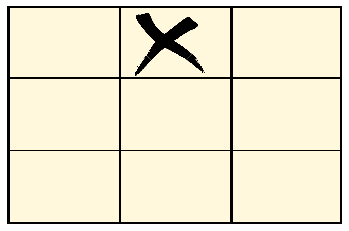

In [11]:
tri = Triqui()
s = tri.estado_inicial
a = choice(tri.acciones(s))
print("Este es el tablero con una X en", a)
s1 = tri.resultado(s, a)
tri.pintar_estado(s1)
print("Juego terminado?:", tri.es_terminal(s1)) # Debe ser False
print("Le corresponde el turno a:", 'O' if tri.a_jugar(s1) == 1 else 'X') # Debe ser O
print("Utilidad:", tri.utilidad(s1, tri.a_jugar(s1))) # Debe ser None

In [17]:
s
tri.a_jugar(s)

matrix([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

# Algoritmo minimax <a class="anchor" id="minimax"></a>

([Volver al inicio](#inicio))

Debemos ahora definir un programa para el agente que juega triqui. Este programa debe consistir, de manera general, en una función que percibe un tablero de triqui y devuelve una acción. Más concretamente, el agente recibe un estado `s` y devuelve una jugada, en forma de un índice `(x,y)` que representa la casilla en la cual ha de ponerse el símbolo correspondiente (o bien $O$ o bien $X$). 

El algoritmo que utilizaremos para encontrar la mejor jugada se llama *minimax*. Este nombre es muy acertado, toda vez que evoca simultáneamente la confrontación entre los jugadores así como la manera como se representa dicha confrontación. Esto es, un jugador buscará el mínimo y el otro el máximo de la utilidad. Esta es la razón por la cual se definió la función de utilidad de tal manera que un estado en el que gane $O$ valga -1 y uno en que gane $X$ valga 1. El primer jugador será MIN y el segundo MAX.

## Árbol de confrontación <a class="anchor" id="arbol"></a>

([Volver a minimax](#minimax))

Dado un estado `s`, se define un árbol de confrontación para `s` de la siguiente manera. Se consideran para el jugador que tiene el turno, digamos MAX, todas las acciones `i` que se pueden aplicar, y para cada una de ellas se encuentra el correspondiente estado `s`$_i$. Luego, para cada uno de estos, se consideran para MIN todas las acciones que se pueden aplicar y se encuentran los correspondientes estados. Esta iteración se repite hasta llegar a los estados en los cuales el juego se termina. En estos estados podemos hallar la utilidad y aquí comenzamos a encontrar los valores minimax de todo el arbol. Es decir, hemos construido el árbol de arriba hacia abajo (de la raíz hacia las hojas) siguiendo las acciones posibles. Ahora encontraremos los valores minimax para cada estado yendo de abajo hacia arriba (de las hojas hacia la raíz). Así pues, obtenemos los valores minimax a partir de la utilidad de los estados terminales, por ejemplo:

<img src="imagenes/ejemplo1.png" width="250px">

Suponiendo que estos estados provienen de una acción de las $X$, ellos provienen de estados más arriba en el árbol, como por ejemplo:

<img src="imagenes/ejemplo2.png" width="250px">

Como la acción en dichos estados es de $X$, que es MAX, entonces el valor minimax se obtiene al encontrar el máximo dentro de todas las opciones posibles. Esto no es interesante en este caso, pues sólo hay una acción posible para $X$, el cual determina el valor minimax para dicho estado.

El siguiente nivel hacia arriba es más interesante, pues $O$ (es decir, MIN), tiene varias opciones:

<img src="imagenes/ejemplo3.png" width="260px">

En este caso $O$ tiene dos opciones, cada una reportando un valor minimax. El valor que MIN escogerá es el mínimo entre los dos valores, es decir, 0. Este es el valor minimax de este estado.

Ahora consideremos un nivel más arriba. Juega $X$ (es decir, MAX):

<img src="imagenes/ejemplo4.png" width="550px">

En el estado que vemos más arriba, el jugador de las $X$ es quien tiene el turno, es decir, juega MAX. Él debe seleccionar la opción que le reporte el máximo de los valores minimax de sus hijos. En este caso, debe seleccionar la única opción con valor 0. Observe que si $X$ seleccionara cualquier otra opción (las cuales tienen valor $-1$), entonces MIN ganaría (suponiendo que MIN juega de la mejor manera posible). Esto es, MAX busca la acción cuyo resultado tenga el mayor valor minimax, por lo que decide poner una $X$ en la casilla de abajo a la izquierda para bloquear el triqui de $O$. Esta acción resulta en el estado de la derecha. 


## Pseudo código para minimax <a class="anchor" id="codigo"></a>

([Volver a minimax](#minimax))

El siguiente es el pseudo código del algoritmo de decisión minimax, el cual genera, mediante una metodología depth-first, el árbol de confrontación para un estado `s` en el cual le corresponde el turno a MAX:

<img src="imagenes/busqueda-minimax.png" width="500px">


**Ejercicio 1:**

Implemente el anterior pseudocódigo para la función `minimax_search`. Compruebe que la respuesta de $X$ para el siguiente tablero debe ser bloquear el triqui de $O$ en la casilla $(0,0)$.

---

In [13]:
def max_value(game: Triqui, state:np.matrix):

    player = game.a_jugar(state)
    
    if game.es_terminal(state)
        return game.utilidad(state, player)
    
    v = - np.inf
    
    for action in game.acciones(state):
        v2, action2 = min_value(game, game.result(state, action))
    
    
    return

**Ejercicio 2:**

Compruebe la correctitud de su algoritmo mediante los siguientes tableros de prueba:

NameError: name 'minimax_search' is not defined

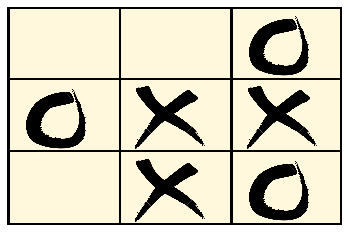

In [7]:
# Primer tablero de prueba
s1 = tri.resultado(tri.estado_inicial, (1,1))  # Juega X
s1 = tri.resultado(s1, (0,1)) # Juega O
s1 = tri.resultado(s1, (2,1)) # Juega X
s1 = tri.resultado(s1, (2,2)) # Juega O
s1 = tri.resultado(s1, (1,0)) # Juega X
s1 = tri.resultado(s1, (2,0)) # Juega O
tri.pintar_estado(s1)
print("Computador juega en:", minimax_search(tri, s1)) 
# La respuesta debe ser (1, 2)

In [ ]:
# Segundo tablero de prueba
s1 = tri.resultado(tri.estado_inicial, (2,1)) # Juega X
s1 = tri.resultado(s1, (0,1)) # Juega O
s1 = tri.resultado(s1, (1,2)) # Juega X
s1 = tri.resultado(s1, (1,0)) # Juega O
s1 = tri.resultado(s1, (1,1)) # Juega X
s1 = tri.resultado(s1, (0,2)) # Juega O
tri.pintar_estado(s1)
print("Computador juega en:", minimax_search(tri, s1)) 
# La respuesta debe ser (0, 0)

In [ ]:
# Tercer tablero de prueba
s1 = tri.resultado(tri.estado_inicial, (1,1)) # Juega X
s1 = tri.resultado(s1, (0,1)) # Juega O
s1 = tri.resultado(s1, (0,0)) # Juega X
s1 = tri.resultado(s1, (2,2)) # Juega O
tri.pintar_estado(s1)
print("Computador juega en:", minimax_search(tri, s1)) 
# La respuesta debe ser (1, 0) o (2, 0)

---

Observe que la clase `Triqui` tiene el método `a_jugar`, el cual recibe un estado `s` y devuelve el jugador al que le corresponde el turno en `s`. La codificación es que si `a_jugar(s)` es 1, le corresponde el turno a $O$; y si es 2, le corresponde el turno a $X$:

In [ ]:
tri = Triqui()
s = tri.estado_inicial
s = tri.resultado(s, (1,1)) # Juega X
s = tri.resultado(s, (0,2)) # Juega O
if tri.a_jugar(s)==2:
    print('Le corresponde el turno a X')
elif tri.a_jugar(s)==1:
    print('Le corresponde el turno a O')    

**Ejercicio 3:**

Adapte la función `minimax_search` para que la decisión que se tome sea sensible al jugador al que le corresponde el turno. De esta manera, si juegan las $X$, se busca maximizar el valor, pero si juegan las $O$, se busca minimizar el valor. Confirme la correctitud de su respuesta con el cuarto tablero de prueba:

---

## Implementando el engine <a class="anchor" id="engine"></a>

([Volver a minimax](#minimax))

¡Ya podemos jugar contra el computador! Intente ganarle al engine que acabamos de construir mediante el análisis minimax:

In [ ]:
# Corra esta celda para comenzar un juego nuevo

from Juegos import Triqui
from IPython.display import clear_output
from time import sleep
import matplotlib.pyplot as plt

tri = Triqui()
s = tri.estado_inicial

In [ ]:
# Introduzca aquí su jugada, corra la celda y espere
# la jugada de O. Luego, vuelva a cambiar aquí mismo 
# su jugada y corra la celda de nuevo, etc.
a = (0,1)

assert(a in tri.acciones(s)), 'Acción no permitida. Intente de nuevo.'

###################
s = tri.resultado(s, a)
#clear_output(wait=True)
tri.pintar_estado(s)
plt.show()

# Computador responde
if not tri.es_terminal(s):
    a = minimax_search(tri, s)
    s = tri.resultado(s, a)
    sleep(1)
    clear_output(wait=True)
    tri.pintar_estado(s)
    plt.show()
    if tri.es_terminal(s):
        print('Juego terminado. ¡Gana O!')
else:
    jugador = tri.a_jugar(s)
    if tri.utilidad(s, jugador)==0:
        print('Juego terminado. ¡Empate!')
    else:
        print('Juego terminado. ¡Gana X!')

----

El algoritmo minimax realiza una exploración completa del espacio de estados mediante una metodología depth-first. Si la profundidad máxima del árbol fuera $m$ y en cada estado hubiera $b$ acciones posibles, entonces la complejidad de tiempo del algoritmo es $O(b^m)$. Como se están generando todos los hijos de cada nodo al mismo tiempo, la complejidad de espacio (memoria) es de $O(bm)$.

La complejidad exponencial de este algoritmo lo hace ineficiente para muchos juegos complejos. Una manera de prevenir que el árbol de estados crezca tan rápido es dejando de explorar opciones que no parecen viables. Una de estas alternativas se llama el algoritmo de poda alfa-beta, que veremos a continuación.

---

## En este notebook usted aprendió 

([Volver al inicio](#inicio))

* El algoritmo minimax para la toma de decisiones perfecta en un juego competitivo de 2 jugadores.